In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data=pd.read_csv(r"C:\Users\91938\Desktop\Top Mentor\Machine Learning\15th November\10. Random Forests\Fraud_check.csv")
    print(data.head(2))
except Exception as e:
    print(e)

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   

  Urban  
0   YES  
1   YES  


In [3]:
df=data
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
df['Fraud_Status'] = np.where(
    df['Taxable.Income'] <= 30000, 'Risky', 'Good'
)

In [7]:
df['Fraud_Status'].value_counts()

Fraud_Status
Good     476
Risky    124
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Fraud_Status       0
dtype: int64

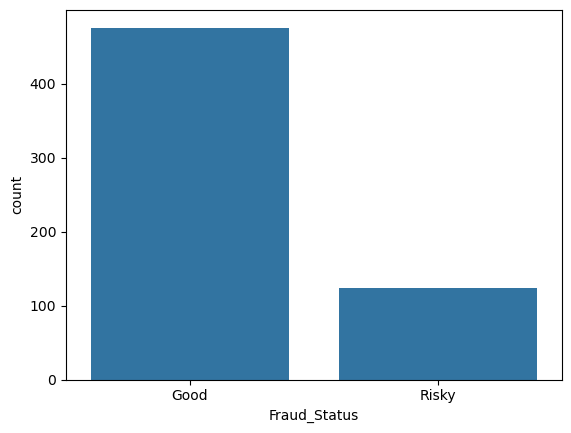

In [9]:
sns.countplot(x='Fraud_Status', data=df)
plt.show()

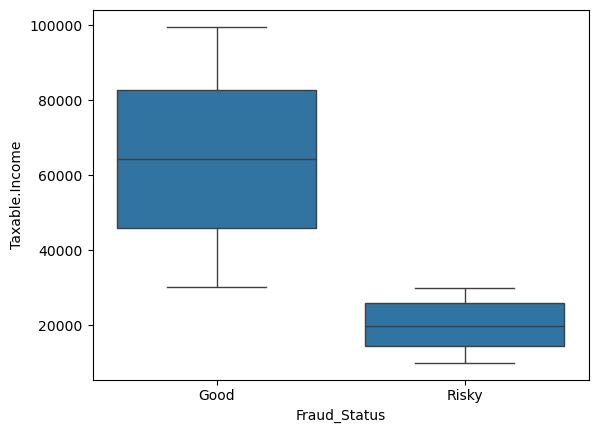

In [10]:
sns.boxplot(x='Fraud_Status', y='Taxable.Income', data=df)
plt.show()

In [ ]:
#Clear separation between Risky and Good customers
#Confirms rule-based target creation

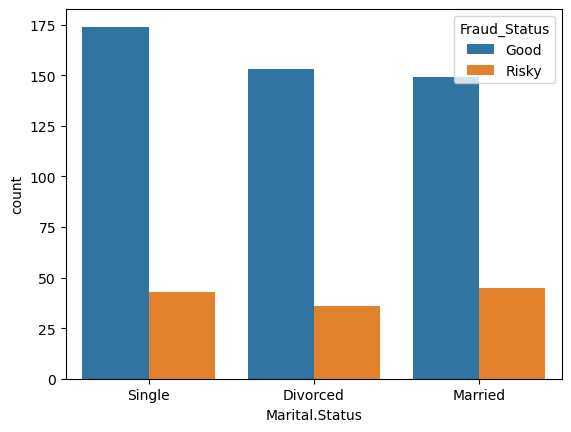

In [11]:
sns.countplot(x='Marital.Status', hue='Fraud_Status', data=df)
plt.show()

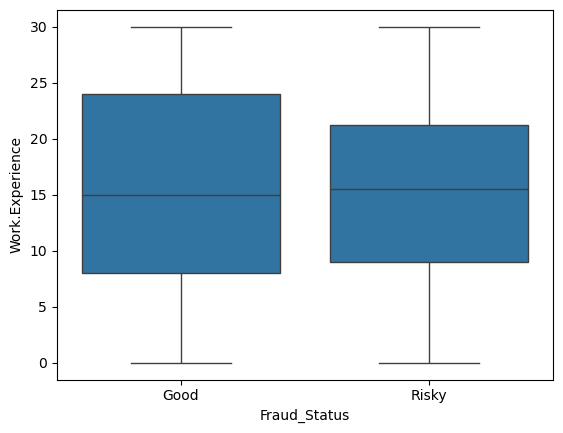

In [12]:
sns.boxplot(x='Fraud_Status', y='Work.Experience', data=df)
plt.show()

In [13]:
#Higher work experience → lower fraud risk

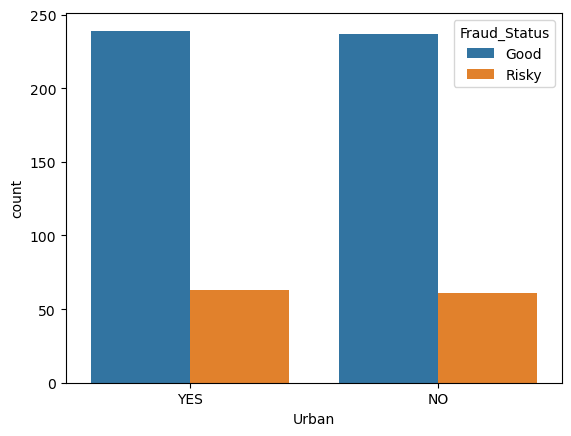

In [14]:
sns.countplot(x='Urban', hue='Fraud_Status', data=df)
plt.show()

In [15]:
#Urban factor has limited impact

In [16]:
df.drop('Taxable.Income', axis=1, inplace=True)

In [17]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Fraud_Status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [18]:
df_encoded = pd.get_dummies(
    df,
    columns=['Undergrad', 'Marital.Status', 'Urban'],
    drop_first=True
)
X = df_encoded.drop('Fraud_Status', axis=1)
y = df_encoded['Fraud_Status']

In [19]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [38]:
from sklearn.ensemble import RandomForestClassifier 

In [39]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
pred=model.predict(X_test)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
  

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
acc=accuracy_score(y_test,pred)

In [43]:
acc

0.75

In [44]:
cf=confusion_matrix(y_test,pred)
cf

array([[90,  4],
       [26,  0]])

In [45]:
model.feature_importances_

array([0.53090778, 0.34071637, 0.03804012, 0.02691077, 0.02708792,
       0.03633703])

In [46]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance

,Feature,Importance
0,City.Population,0.530908
1,Work.Experience,0.340716
2,Undergrad_YES,0.038040
5,Urban_YES,0.036337
4,Marital.Status_Single,0.027088
3,Marital.Status_Married,0.026911


In [ ]:
#Customers from low-population areas are more likely to be Risky
#Higher population regions tend to have more stable income patterns

In [ ]:
#Lower work experience → higher fraud risk
#Higher experience → financially stable → “Good” customers

In [ ]:
#Feature importance analysis using Random Forest revealed that city population and work experience are the most significant indicators of fraud risk, contributing over 85% of the model’s predictive power.
#Customers from lower population regions and with limited work experience were more likely to be classified as risky. 
#Other demographic variables such as education level, marital status, and urban location had minimal impact on fraud classification.